In [1]:
import csv
import os
import numpy as np
import pandas as pd
import networkx as nx
import pdb
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from sklearn.metrics import mutual_info_score

In [2]:
file = 'kr-vs-kp.csv'

In [3]:
x = list()
for idx in range(36):
    x.append('x'+str(idx))
x.append('result')
df = pd.read_csv('kr-vs-kp.data', sep=",", header=None,names= x)
# df = pd.read_csv(file, header= None,names= x)
# Shuffle the data
df=df.sample(frac=1)
df_test = df.iloc[2500::, :]
df_train = df.iloc[0:2500,:]
df1 = df_train[(df_train[u'result']=='won')]
df2 = df_train[(df_train[u'result']=='nowin')]

In [4]:
pxc1=[]
# df1['x1'].value_counts()
for i in range(36):
#     print(df1[x[i]].value_counts())
    pxc1.append(df1[x[i]].value_counts().tolist())
    pxc1[i] = [x/sum(pxc1[i]) for x in pxc1[i]]
#     pxc1[i] = pxc1[i]/sum(pxc1[i])

I1 = np.zeros([36,36])
for i in range(36):
    for j in range(36):
        if i!=j:
            pi = df1[x[i]]
            pi = pi.to_list()

            pj = df1[x[j]]
            pj = pj.to_list()
            I1[i,j] = mutual_info_score(pi, pj)

In [5]:
pxc2 = []
for i in range(36):
#     print(df1[x[i]].value_counts())
    pxc2.append(df2[x[i]].value_counts().tolist())
    pxc2[i] = [x/sum(pxc2[i]) for x in pxc2[i]]
    
I2 = np.zeros([36,36])
for i in range(36):
    for j in range(36):
#         if i!=j:
#             pij = df2[[x[i],x[j]]].value_counts()
#             pij = (pij/sum(pij)).to_dict()

            pi = df2[x[i]]
            pi = pi.to_list()

            pj = df2[x[j]]
            pj = pj.to_list()
            
#             pdb.set_trace()
            I2[i,j] = mutual_info_score(pi, pj)

[(0, 10), (0, 24), (10, 25), (10, 14), (10, 35), (10, 30), (10, 34), (14, 12), (30, 19), (30, 6), (30, 18), (34, 31), (12, 17), (6, 7), (6, 4), (6, 20), (6, 5), (6, 29), (17, 33), (17, 1), (7, 8), (4, 11), (4, 22), (20, 9), (20, 32), (5, 3), (33, 2), (1, 15), (8, 21), (22, 16), (32, 26), (2, 23), (26, 13), (26, 27), (26, 28)]


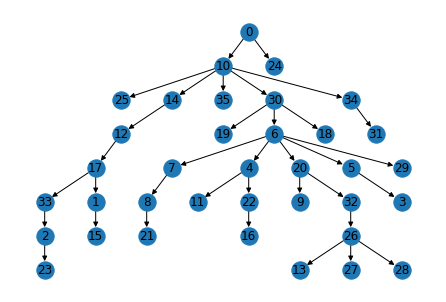

In [6]:
G = nx.Graph()
# G.add_edge(3, 2)
for i in range(35):
    for j in range(i,36):
        G.add_edge(i,j,weight=I1[i,j])

T = nx.maximum_spanning_tree(G)
# T.edges()
tree = nx.bfs_tree(T, 0)
print(tree.edges())
pos = graphviz_layout(tree, prog='dot')
nx.draw(tree,pos,with_labels=True,arrows=True)
plt.savefig("c1won.png", format="PNG")

[(0, 33), (0, 13), (33, 17), (33, 2), (33, 3), (17, 12), (17, 1), (2, 23), (12, 19), (1, 6), (1, 15), (19, 34), (19, 30), (6, 7), (6, 4), (34, 25), (34, 31), (30, 24), (7, 8), (7, 9), (4, 11), (4, 22), (25, 10), (25, 14), (31, 28), (31, 5), (31, 32), (8, 21), (9, 29), (22, 16), (10, 35), (32, 26), (29, 18), (29, 27), (18, 20)]


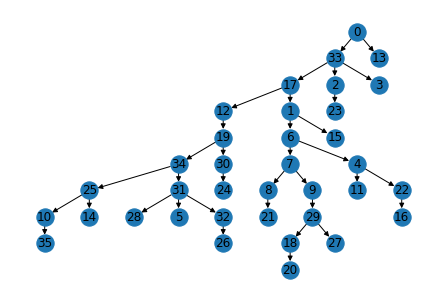

In [7]:
G2 = nx.Graph()
# G.add_edge(3, 2)
I22 = np.loadtxt('I22.txt')
for i in range(35):
    for j in range(i,36):
        G2.add_edge(i,j,weight=I2[i,j])  
G2 =nx.convert_matrix.from_numpy_array(I2)
tree2 = nx.maximum_spanning_tree(G2)
tree2 = nx.bfs_tree(tree2, 0)
print(tree2.edges())
pos = graphviz_layout(tree2, prog='dot')
nx.draw(tree2,pos,with_labels=True,arrows=True)
plt.savefig("c1nowin.png", format="PNG")

In [8]:
def test_data(data,tree,tree2):

    init_prob = df_train[u'result'].value_counts()
    init_prob = (init_prob/sum(init_prob)).to_dict()

    prob = np.array([init_prob['won'],init_prob['nowin']])
    for i in range(36):
        attr = 'x'+str(i)

        parent0 = [n for n in tree.predecessors(i)]
#         pdb.set_trace()
        if len(parent0) == 0:
            pj = df1[attr]
            v = data.loc[attr]
            cp = np.array(pj==v)
            cp = np.mean(cp)
            prob[0] = prob[0]*cp
#             pdb.set_trace()
                    
        else:
#             
            parent = data.loc['x'+str(parent0[0])]
            dataf = df1[(df1['x'+str(parent0[0])]==parent)]
        
            v_children = data.loc[attr]
            cp=np.array(dataf[attr]==v_children)
            cp = np.mean(cp)
            prob[0] = prob[0]*cp
        
    for i in range(36):
        attr = 'x'+str(i)
#         pdb.set_trace()
        parent2 = [n for n in tree2.predecessors(i)]
        if len(parent2) == 0:
            pj = df2[attr]
            v = data.loc[attr]
            cp = np.array(pj==v)
            cp = np.mean(cp)
            prob[0] = prob[0]*cp
        else:
            parent = data.loc['x'+str(parent2[0])]
            dataf = df2[(df2['x'+str(parent2[0])]==parent)]
            
            v_children = data.loc[attr]
            cp=np.array(dataf[attr]==v_children)
            cp = np.mean(cp)
            prob[1] = prob[1]*cp
    
#     id = np.where(prob == max(prob))[0][0]
#     if id == 0:
#         result = 'won'

#     if id == 1:
#         result = 'nowin'
        
    if prob[0]>prob[1]:
        result = 'won'
    else:
        result = 'nowin'

#     if not result==df_test.result.iloc[len(result_test)]:
#         pdb.set_trace()

    return result
                

In [9]:
# test_data(data,edge,edge2,id_row)
result_test = []
for i in range(len(df_test)):
    if np.mod(i,200)==0:
        print('---')
    data = df_test.iloc[i,:]
    result_test.append(test_data(data,tree,tree2))

---
---
---
---


In [10]:
# Accurancy of the results
np.mean(np.array(result_test)== df_test.result.to_numpy())

0.9008620689655172

In [ ]:
result_train = []
for i in range(len(df_train)):
#     id_row = i
    data = df_train.iloc[i,:]
#     pdb.set_trace()
    result_train.append(test_data(data,tree,tree2))

In [ ]:
np.mean(np.array(result_train)== df_train.result.to_numpy())

In [ ]:
len(result_train)